In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np  # pour les numpy array
import matplotlib.pyplot as plt  # librairie graphique
from scipy.integrate import odeint  # seulement odeint

## 1. Un modèle logistique avec la capacité d'accueil du milieu dépendant du temps

On rappelle que le modèle logistique s'écrit
\begin{equation*} N'(t) = r \; N(t) \Bigl( 1 - \frac{N(t)}{K} \Bigr),
\label{logistique} \tag{1}
\end{equation*}
où $r$ et $K$ sont deux constantes strictement positives : $r$ est le taux de croissance (naissance - mort) et $K$ est la capacité du milieu. La solution du problème de Cauchy pour l'équation logistique associé à la donnée initiale $ N( 0 ) = N_0 $ est 
$$
N(t) = \frac{K}{1 + \bigl(\frac{K}{N_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0. \tag{2}
$$

Il est peu réaliste de supposer que dans un modèle décrivant la dynamique d’une population humaine la capacité d’accueil du milieu reste toujours constante. On va considérer un modèle où la capacité de milieu est affectée par des changements technologiques.
On va supposer que de nouvelles technologies augmentent l’efficacité de consommation de ressources et que elles ne se propagent pas instantanément, mais sont plutôt adoptées à un rythme variable.
Ces processus d'adoption sont souvent bien modélisés par une courbe logistique. Premièrement, le taux de l'adoption est lente, car une nouvelle technologie a des difficultés pour remplacer une technologie existante. Ensuite, le taux d'adoption augmente, généralement de façon exponentielle jusqu'à ce que les limites physiques ralentissent l'adoption. 

Nous allons modéliser la taille de la population avec une fonction $ N $ qui satisfait le problème de Cauchy:
$$ N'(t) = r_N \; N(t) \Bigl( 1 - \frac{N(t)}{C(t)} \Bigr), \quad N( 0 ) = N_0 \tag{3}$$
avec $ C $, la capacité d'accueil du milieu, solution du problème suivant:
$$C'(t) =r ( C - K_* ) \Bigl( 1 - \frac{ C - K_* }{ K } \Bigr), \quad C( t_{fl} ) = K_0 + K_*, \tag{4} $$
où $ r, K_*, K, t_{fl}, K_0 $ sont des paramètres réels.



**EXERCICE 1**
> 1. Montrer que si $ \tilde K $ est solution de l'équation logistique (1)  vérifiant $ \tilde K( t_{fl} ) = K_0 $, alors $ C = \tilde K + K_* $ est solution de (4).
> 2. Montrer que si $ P $ est solution de (1) vérifiant $ P( 0 ) = K_0 $, alors la fonction $ \tilde K $ définie par $ \tilde K( t ) = P( t - t_{fl} ) $ est solution de (1) vérifiant $ \tilde K( t_{fl} ) = K_0 $.
> 3. En utilisant l'expression (2) de la solution exacte de l'équation (1) et le résultat des questions 1-2, montrer que la solution exacte de (4) est donnée par la formule
$$
C( t ) = K_* + \frac{K} {( 1 + ( K / K_0 - 1 ) * e^{ - r ( t - t_{fl} ) )}}.
$$

On prend les valeurs suivantes des paramètres: $K= 50$, $K_*=50$, $r = 0.1$, $ t_{fl} = 30 $, $ K_0 = 1 $. 
> 4. Tracer la courbe de $ C $ sur l'intervalle de temps $ [0, T] $ avec $ T = 130 $. Ajouter les lignes horizontales $ C = K_* $, $ C = K + K_* $ et un marqueur au point $ (t_{fl}, K_0+K_*) $, ajouter une légende. En utilisant la figure proposer une interprétation des paramètres $ K $, $ K_* $, $ r $, $ t_{fl} $, $ K_0 $.

Pour la suite on prend les valeurs des paramètres $T=130$, $ N_0 = 10 $, $r_N = 0.2$.
> 5. Construire la solution approchée du problème (3) à l'aide de la fonction `odeint` et la tracer (avec des marqueurs). 
> 6. Superposer la courbe de la fonction $t\mapsto C(t)$. Que remarquez-vous ?
> 7. Faire varier la valeur du paramètre $ N_0 $ et commentez les résultats obtenus.

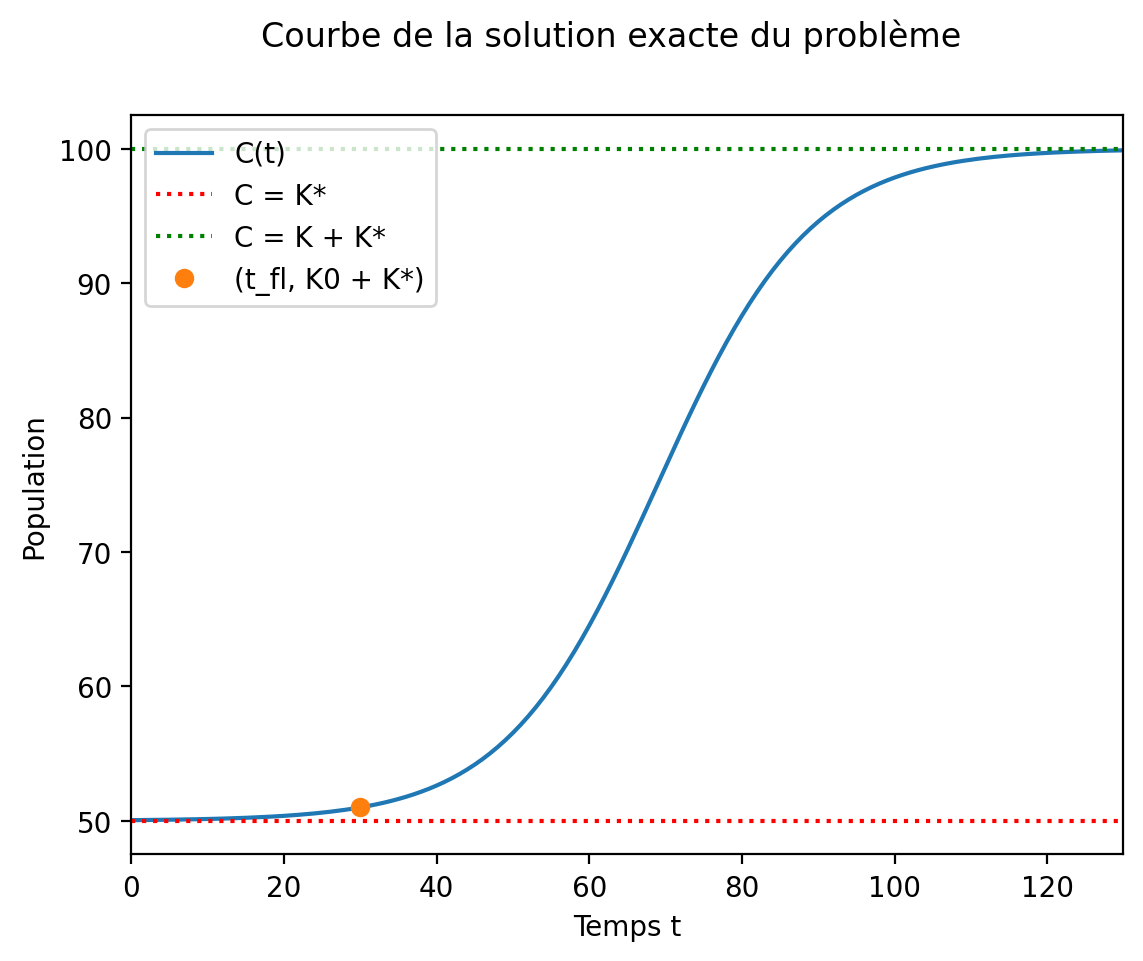

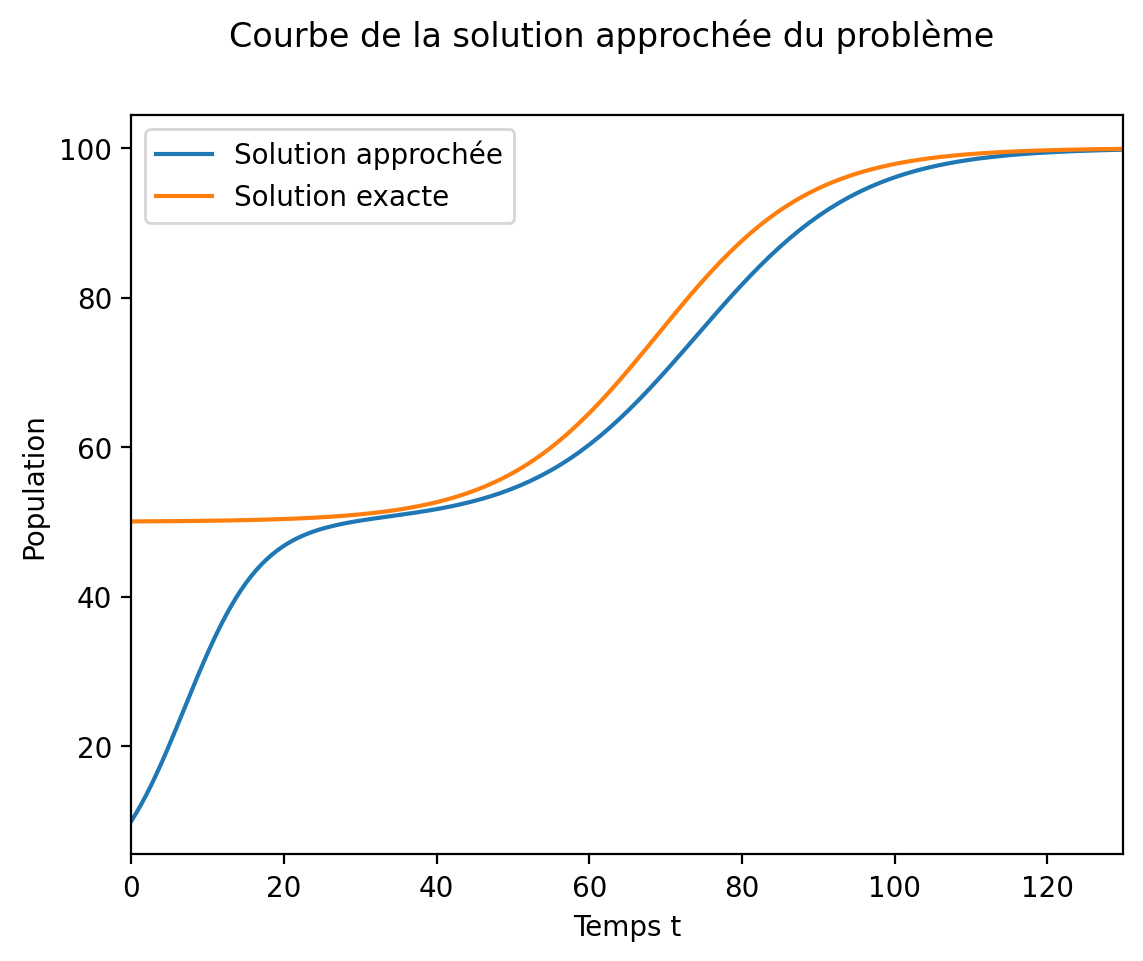

In [2]:
# Initialisation des variables
T = 130
t = np.arange(0, T + 1)

K = 50  # capacité d'accueil maximale du milieu
K_star = 50  # capacité minimale pour maintenir l'espèce
r = 0.1  # taux de  corissance de la capacité d'accueil du milieu.
t_fl = 30  # la find ed la période de formation.
K0 = 1  # Valeur initiale de la capacité d'accueil du milieu.


def C(t):
    """
    Fonction retournant la solution exacte du problème au temps t
    """
    return K_star + K / (1 + (K / K0 - 1) * np.exp(-r * (t - t_fl)))


# On trace le graphique de la solution exacte
plt.plot(t, C(t), label="C(t)")
plt.hlines(K_star, 0, T, linestyle="dotted", label="C = K*", color="red")
plt.hlines(K + K_star, 0, T, linestyle="dotted", label="C = K + K*", color="green")
plt.plot(t_fl, K0 + K_star, "o", label="(t_fl, K0 + K*)")
plt.legend()
plt.xlim(0, 130)
plt.suptitle("Courbe de la solution exacte du problème")
plt.xlabel("Temps t")
plt.ylabel("Population")
plt.show()

# Définition des nouveaux paramètres
N0 = 10
r_N = 0.2


def dN(N, t, C_sol):
    """
    Fonction calculant la dérivée de la solution approchée du problème à l'instant t dépendant de N(t) et de C(t)
    """
    return r_N * N * (1 - N / C_sol(t))


t = np.linspace(0, T, 200)
N_sol = odeint(dN, N0, t, args=(C,))  # On calcule la solution a l'aide de odeint

# On trace le graphique de la solution approchée en comparaison à la solution exacte
plt.plot(t, N_sol, label="Solution approchée")
plt.plot(t, C(t), label="Solution exacte")
plt.legend()
plt.xlim(0, 130)
plt.suptitle("Courbe de la solution approchée du problème")
plt.xlabel("Temps t")
plt.ylabel("Population")
plt.show()

## 2. L'impact de la pêche dans le modèle Lotka-Volterra


L'objectif de cette partie est d'étudier numériquement l'impact de la peche dans le modèle de Lotka-Volterra et d'illustrer le paradoxe observé par d'Anconna (voir la fiche de cours n°1).

On se donne donc deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi:

\begin{equation*}
     \begin{cases}
        H'(t)&=H(t)( a-p-bP(t)),\\
        P'(t)&=P(t)( -c -p +dH(t)).
     \end{cases}
\end{equation*}

où $a,b,c,d,p >0$. Le coefficient $a$ représente le taux de reproduction des sardines en l'abscence de requins, $c$ le taux de mortalité en l'abscence de sardines, $b$ le taux de mortalités des sardines mangés par les requins et $d$ le taux de reproduction des requins en fonction de la quantité de sardines mangées. Nous pêchons une même proportion $p$ de requins et de sardines ce qui se traduit par l'ajout de deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations du modèle Lotka-Volterra.

On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :

\begin{equation*}
     \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0,
     \end{cases}
\end{equation*}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.

Pour toutes les applications numériques, on choisit : $a=0.1$, $b=d=6\cdot 10^{-5},$ $c=0.05$. On choisit une population initiale de $H_0=1500$ sardines et $P_0=500$ requins.

**EXERCICE 2**

> 1. Reprenez chacune des questions des Exercices 1-3 du TP02 pour ce modèle. Visualisez la solution pour les valeurs de p  de la liste $ [0, 0.02, 0.04, 0.06] $. On pourra tracer le champs de vecteurs pour $ p = 0 $ uniquement.
> 2. Expliquez quel est l'impact de la pêche sur l'évolution des populations. Ce modèle permet-il d'expliquer les observations de d'Anconna sur la peche de la sardine dans la mer Adriatique (voir le cours)? Justifiez votre réponse.
> 3. Quelle espèce est favorisée par la pêche? 

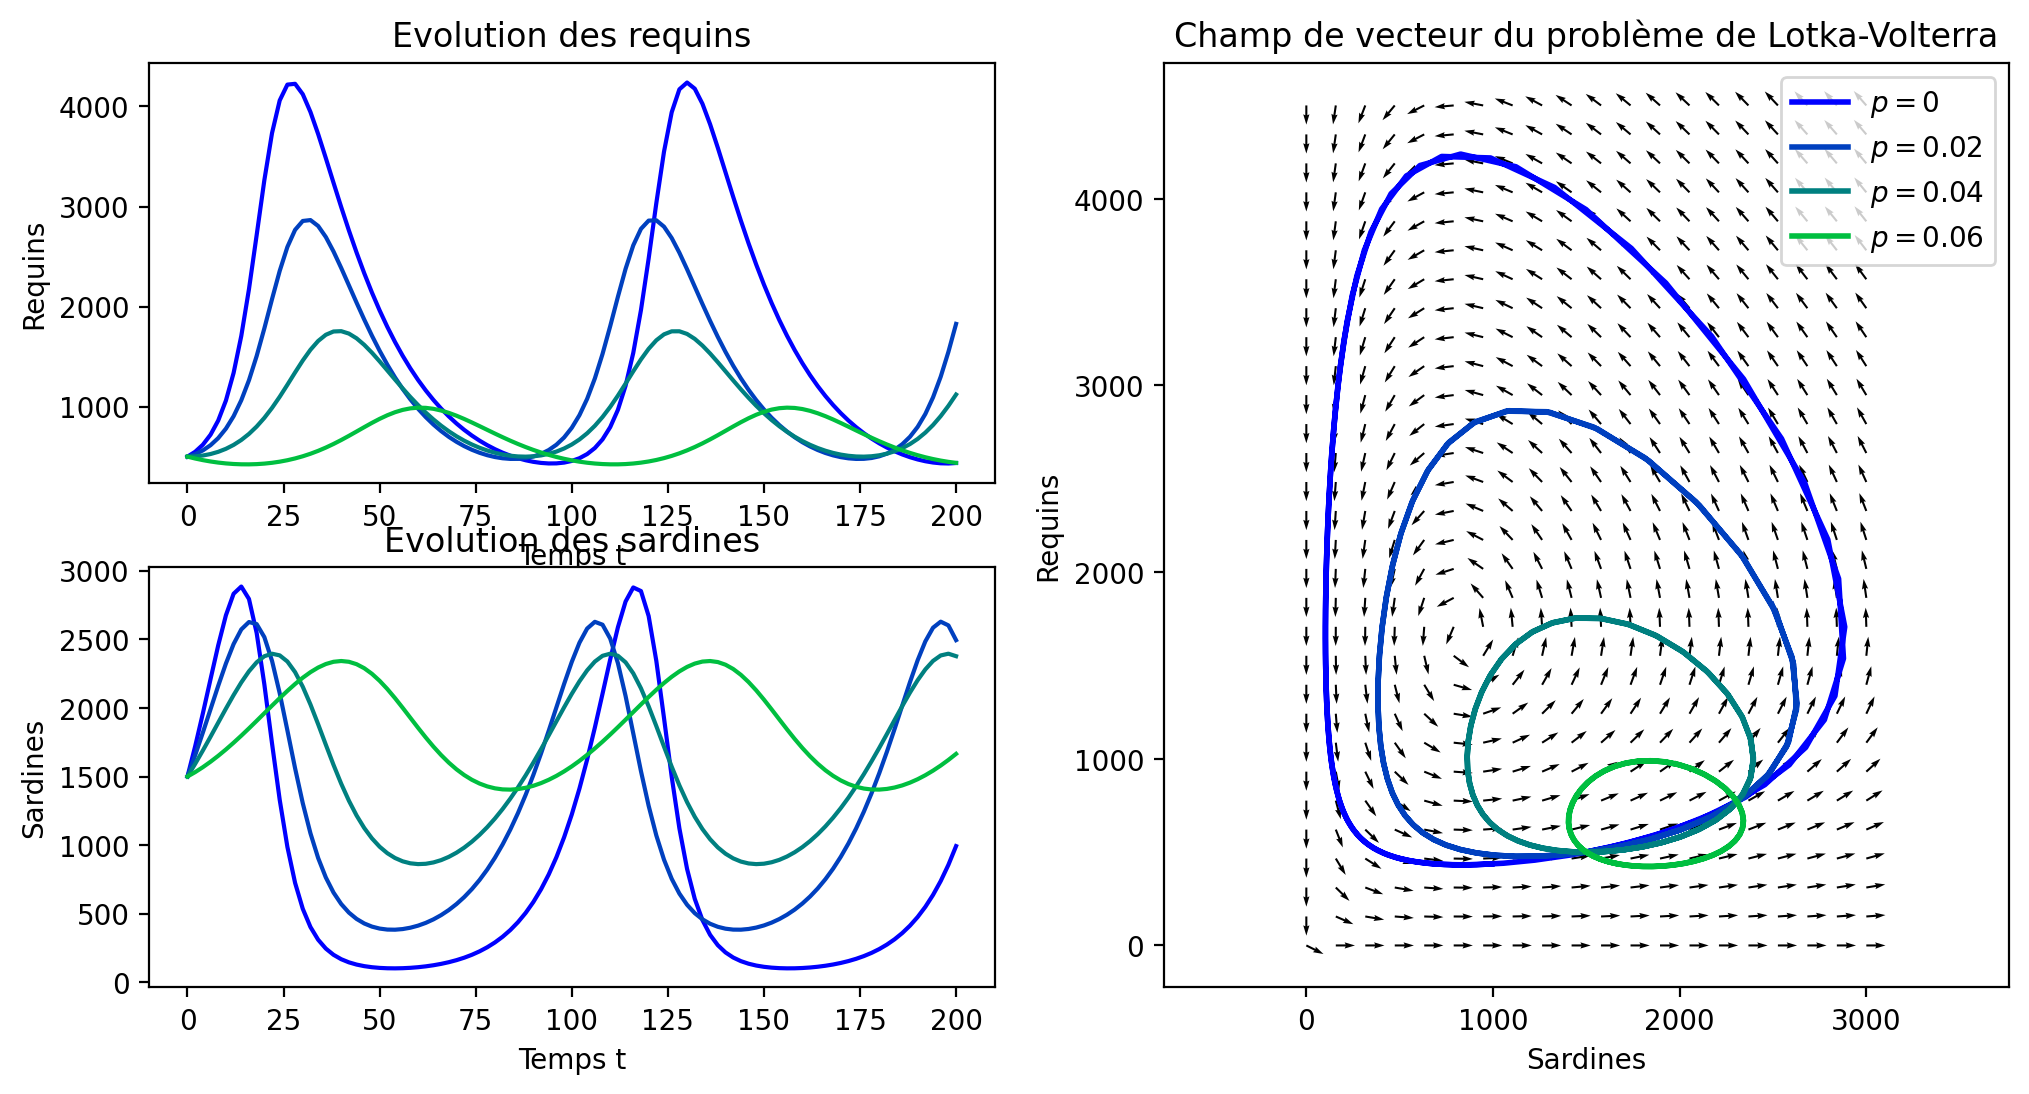

In [3]:
# Définition des paramètres
a, b, c, d = 0.1, 6e-5, 0.05, 6e-5
T, N = 200, 100
H0, P0 = 1500, 500


def F(X, t, a, b, c, d, p):
    """Fonction second membre pour le système"""
    x, y = X
    return np.array([x * (a - p - b * y), y * (-c - p + d * x)])


t = np.linspace(0, T, N + 1)
sardines, requins = np.meshgrid(np.linspace(0.1, 3000, 20), np.linspace(0.1, 4500, 30))
fsardines = F((sardines, requins), t, a, b, c, d, 0)[0]
frequins = F((sardines, requins), t, a, b, c, d, 0)[1]
n_sndmb = np.sqrt(fsardines**2 + frequins**2)

# On crée une figure à trois graphiques
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(
    1, 2, 2
)  # subplot pour le champ de vecteurs et le graphe sardines vs requins
axr = fig.add_subplot(
    2, 2, 1
)  # subplot pour le graphe du nombre de requins en fonction du temps
axs = fig.add_subplot(
    2, 2, 3
)  # subplot pour le graphe du nombre de sardines en fonction du temps
ax.quiver(sardines, requins, fsardines / n_sndmb, frequins / n_sndmb)

list_p = [0, 0.02, 0.04, 0.06]
for k, pk in enumerate(list_p):
    couleur = (0, k / len(list_p), 1 - k / len(list_p))
    X = odeint(F, np.array([H0, P0]), t, args=(a, b, c, d, pk))

    # Tracer la courbe parametrée (H(t),P(t))
    ax.plot(X[:, 0], X[:, 1], linewidth=2, color=couleur, label=f"$p={pk}$")

    # Tracer H en fonction du temps
    axs.plot(t, X[:, 0], label=f"Sardines pour p={pk}", color=couleur)

    # Tracer P en fonction du temps
    axr.plot(t, X[:, 1], label=f"Requins pour p={pk}", color=couleur)

ax.axis("equal")
ax.set_title("Champ de vecteur du problème de Lotka-Volterra")
ax.set_xlabel("Sardines")
ax.set_ylabel("Requins")
ax.legend()

axr.set_xlabel("Temps t")
axr.set_ylabel("Requins")

axs.set_xlabel("Temps t")
axs.set_ylabel("Sardines")

axs.set_title("Evolution des sardines")
axr.set_title("Evolution des requins")
plt.show()

## 3. Schéma de Crank-Nicolson

Le *schéma de Crank-Nicolson* consiste à construire la suite $ y^n $ des valeurs approchées de $ y( t^n ) $, $ n = 0, 1, \ldots, N $, via les relations suivantes:

\begin{equation*}
\left\lbrace
\begin{aligned}
& y^{ n+1 } = y^n + \frac{\Delta t}{ 2 }\left( f( t_{ n }, y^{ n } ) + f( t_{ n+1 }, y^{ n+1 } )
\right), \quad n = 0, 1, 2, \ldots, N-1, \\
& y^0 = y_0.
\end{aligned}
\right.
\end{equation*}


**EXERCICE 3**
> 1. Le schéma de Crank-Nicolson est-il explicite ou implicite? Justifiez votre réponse. 
> 2. Pour la fonction $ f $ définie par $ f( t, y ) = r y $ écrivez la relation qui donne $y^{n+1}$ en fonction de $y^n$ pour le schéma de Crank-Nicolson.
> 3. Programmez la méthode *crank_nicolson* afin de calculer la solution approchée du problème de Cauchy du modèle de Malthus. On écrira une fonction `crank_nicolson` qui prend en argument un nombre `y0` (la valeur initiale de la concentration), un nombre `T` (la longueur de l'intervalle de temps), un nombre $ N $ (le nombre de points) et un nombre `r` (le taux de croissance dans le modèle de Malthus), et qui retourne deux tableaux : `t`, constitué des instants $ 0, \Delta t, 2 \Delta t, \ldots, N \Delta t $, avec $ \Delta t = T / N $, et `y`, constitué des valeurs de la solution approchée en ces instants. On étudiera le modèle de Malthus avec $ r = -4 $ et on prendra $ y_0 = 1 $, $ T = 16 $.
> 4. Pour la méthode d'Euler explicite et pour le schéma de Crank-Nicolson, tracez sur un même graphique, la solution exacte et les solutions approchées du modèle de Malthus pour les valeurs $ N = 31, 32, 33, 34$. 
Commentez le graphique obtenu. Pour trouver une solution approchée du modèle de Malthus étudié quelle méthode numérique choisiriez-vous ? Expliquez votre choix. 
> 5. Pour l'équation de Malthus, calculez et affichez les erreurs globales du schéma de Crank-Nicolson pour différentes valeurs de $\Delta t$. Estimez l'ordre de convergence du schéma de Crank-Nicolson pour l'équation de Malthus. L'ordre de convergence du schéma de Crank-Nicolson est-il plus elevé que l'ordre de convergence du schéma d'Euler implicite?

In [4]:
def crank_nicolson(y0, T, N, r):
    """
    schéma de Crank-Nicolson pour le modèle de Malthus

    Parameters
    ----------

    y0: float
        donnée initiale
    T: float
        instant final
    N: int
        nombre de pas de temps
    r: float
       taux de croissance dans le modèle de Malthus

    Returns
    -------

    t: ndarray
        les instants où la solution approchée est calculée
    y: ndarray
        les valeurs de la solution approchée par le theta-schema
    """

    dt = T / N
    t = np.zeros(N + 1)
    y = np.zeros(N + 1)
    tk, yk = 0, y0
    y[0] = yk

    for n in range(N):
        tk += dt
        yk *= (2 + dt * r) / (2 - dt * r)
        y[n + 1] = yk
        t[n + 1] = tk

    return t, y


def euler_explicit(y0, T, N, r):
    """
    schéma de d'Euler pour le modèle de Malthus

    Parameters
    ----------

    y0: float
        donnée initiale
    T: float
        instant final
    N: int
        nombre de pas de temps
    r: float
       taux de croissance dans le modèle de Malthus

    Returns
    -------

    t: ndarray
        les instants où la solution approchée est calculée
    y: ndarray
        les valeurs de la solution approchée par le theta-schema
    """
    dt = T / N
    t = np.zeros(N + 1)
    y = np.zeros(N + 1)
    tk, yk = 0, y0
    y[0] = yk

    for n in range(N):
        tk += dt
        yk += dt * r * yk
        y[n + 1] = yk
        t[n + 1] = tk

    return t, y


def solution_exacte(t):
    """
    Fonction calculant la solution exacte du modèle de Malthus à l'instant t
    """
    return y0 * np.exp(r * t)

Text(0, 0.5, 'y')

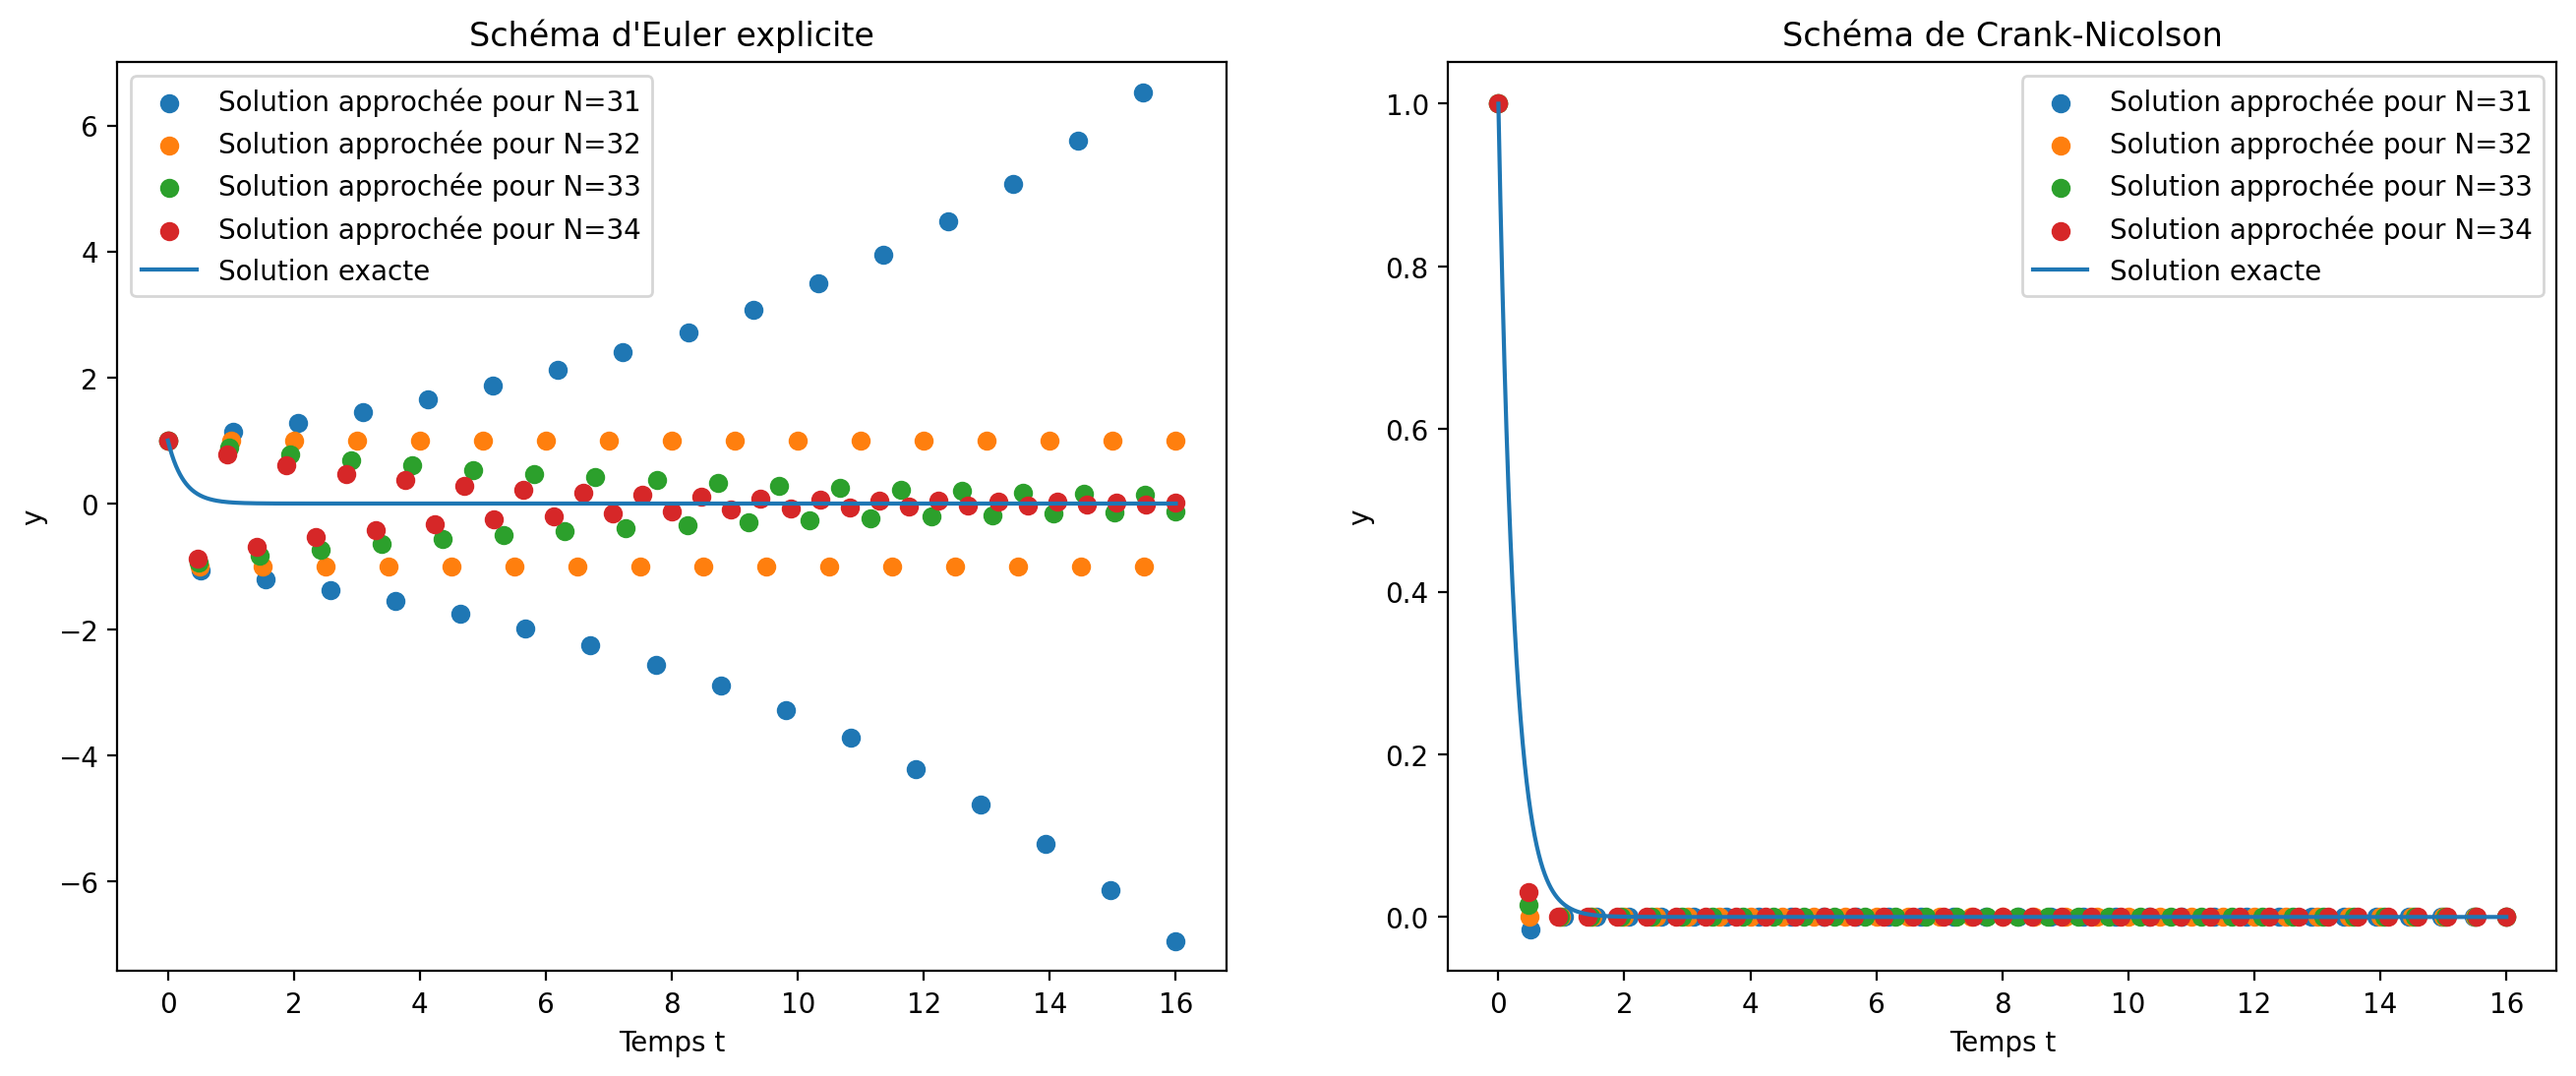

In [6]:
# Définition des paramètres
r = -4
liste_N = [31, 32, 33, 34]
T = 16
y0 = 1

t_exact = np.linspace(0, T, 1000)

fig = plt.figure(figsize=(16, 6))

# Schéma d'Euler explicite
ax = fig.add_subplot(1, 2, 1)
for n in liste_N:
    t, y = euler_explicit(y0, T, n, r)  # On calcule la fonction Euler pour chaque n
    ax.scatter(t, y, label=f"Solution approchée pour N={n}")

ax.plot(t_exact, solution_exacte(t_exact), label="Solution exacte")
ax.legend()
ax.axis("equal")
ax.set_title("Schéma d'Euler explicite")
ax.set_xlabel("Temps t")
ax.set_ylabel("y")


# Schéma de Crank-Nicolson
ax = fig.add_subplot(1, 2, 2)
for n in liste_N:
    t, y = crank_nicolson(
        y0, T, n, r
    )  # On calcule la fonction Crank-Nicolson pour chaque n
    ax.scatter(t, y, label=f"Solution approchée pour N={n}")
ax.plot(t_exact, solution_exacte(t_exact), label="Solution exacte")
ax.legend()
ax.set_title("Schéma de Crank-Nicolson")
ax.set_xlabel("Temps t")
ax.set_ylabel("y")

Delta_t =  1.600e-01, e =  5.255e-01
Delta_t =  1.600e-01, e =  2.715e-01
Delta_t =  1.600e-01, e =  5.853e-02
Delta_t =  1.600e-01, e =  1.266e-02
Delta_t =  1.600e-01, e =  3.173e-03
Delta_t =  1.600e-01, e =  5.030e-04
Delta_t =  1.600e-01, e =  1.256e-04


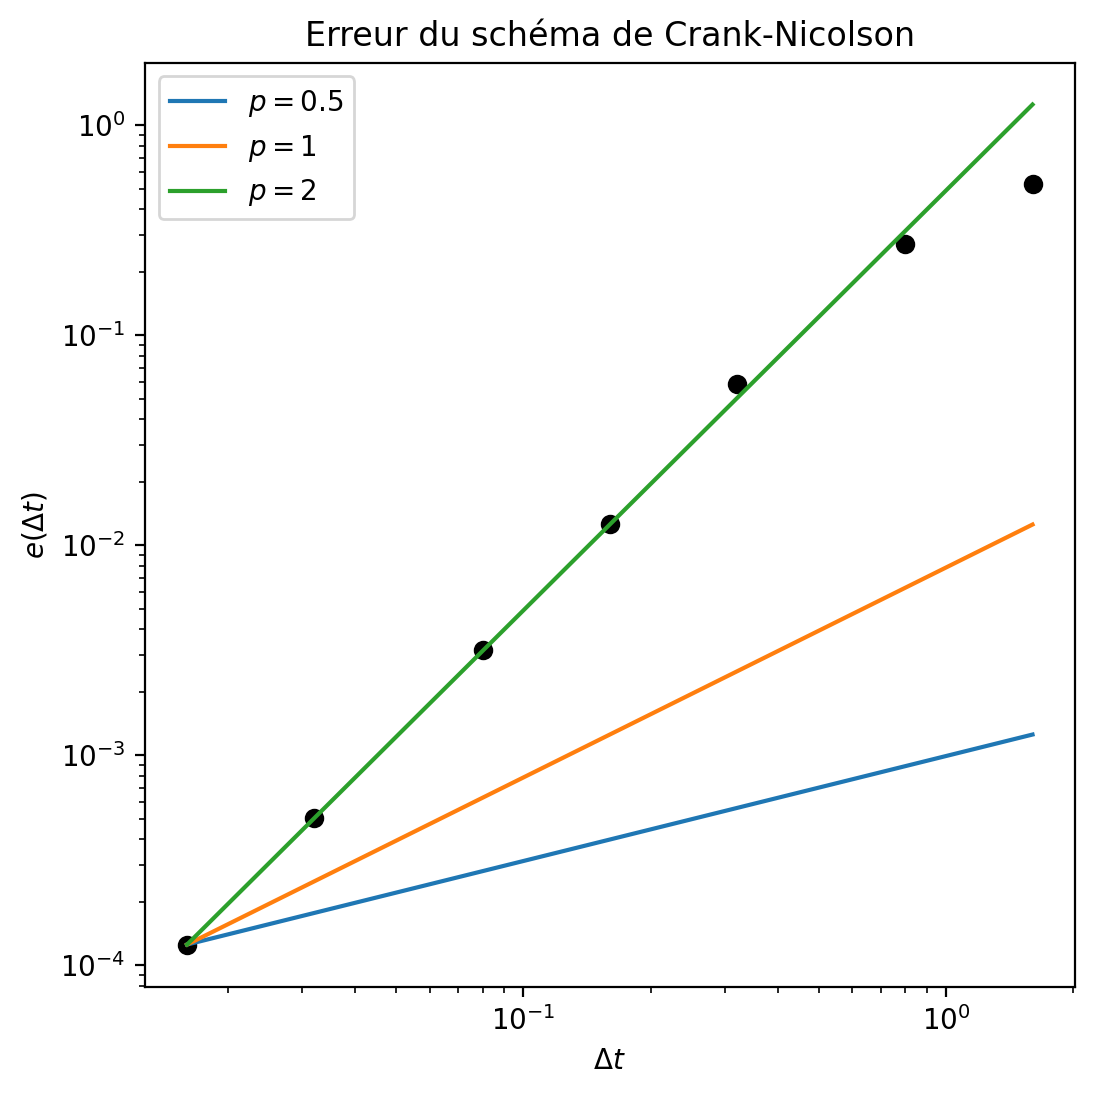

In [7]:
liste_N = np.array([10, 20, 50, 100, 200, 500, 1000])
liste_delta = T / liste_N
liste_erreur = np.zeros(liste_N.size)

for k, n in enumerate(liste_N):
    t, sol_appr = crank_nicolson(y0, T, n, r)
    sol_ex = solution_exacte(t)
    erreur = np.max(np.abs(sol_appr - sol_ex))
    # erreur = np.linalg.norm(sol_appr - sol_ex, np.inf)
    print(f"Delta_t = {T / N:10.3e}, e = {erreur:10.3e}")
    liste_erreur[k] = erreur

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(liste_delta, liste_erreur, color="black")
for p in [0.5, 1, 2]:
    C = liste_erreur[-1] / (liste_delta[-1] ** p)
    plt.plot(liste_delta, C * liste_delta**p, label=f"$p={p}$")
ax.set_title("Erreur du schéma de Crank-Nicolson")
ax.set_xlabel(r"$\Delta t$")
ax.set_ylabel(r"$e(\Delta t)$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
plt.show()